Copyright and License
© 2026, Jaime Rodríguez Membrive

This Jupyter Notebook is licensed under the MIT License.

Disclaimer:

- This notebook is provided “as is”, without warranty of any kind, express or implied.
- The author assumes no responsibility or liability for any errors, omissions, or outcomes resulting from the use of this notebook or its contents.
- All analyses and interpretations are for educational and research purposes only and do not constitute medical or clinical advice.

Dataset Note:

This project is built upon a high-fidelity synthetic dataset, meticulously engineered to mirror the deterministic physical relationships and stochastic behaviors inherent in real-world mobile networks

---

# 0. Abstract: Machine Learning-Based Throughput Estimation

The primary objective of developing a 5G Throughput (THP) estimator is to transition from reactive network monitoring to proactive Quality of Experience (QoE) management. By leveraging high-dimensional Key Performance Indicators (KPIs) such as Cell Load, Channel Quality Indicator (CQI), Downlink Bandwidth, and MIMO configurations (Number of Antennas), this activity aims to model the complex, non-linear behavior of 5G New Radio (NR) interfaces. The estimator serves as a digital twin of the air interface, allowing engineers to simulate how environmental and configuration changes impact the end-user data rates without the need for costly and time-consuming drive tests.

For mobile operators, the business value of an accurate THP estimator is multi-fold:

- Capex Optimization: It enables "Precision Planning," identifying exactly where infrastructure upgrades (e.g., transitioning from 2x2 to 4x4 or 8x8 MIMO) will yield the highest return on investment in terms of capacity gain.

- Churn Reduction: By predicting areas of low throughput before they lead to customer complaints, operators can implement proactive optimization (e.g., load balancing or tilt adjustments), directly improving customer retention and Net Promoter Scores (NPS).

- SLA Assurance: In the era of 5G Slicing, operators must guarantee specific bitrates for enterprise partners (Industry 4.0, IoT). An estimator provides the analytical backbone to verify if the current network state can support these Service Level Agreements (SLAs).

Usage in Real Mobile Operators:

In a live operational environment, this tool is integrated into the Self-Organizing Network (SON) or the Network Management System (NMS). It can be used by:

- Optimization Teams: To perform "What-if" analysis, such as predicting the impact of increasing bandwidth on a specific frequency band versus adding more antenna layers in a high-traffic urban sector.

- Marketing & Sales: To provide realistic "coverage and speed" maps to potential customers based on actual network conditions rather than theoretical maximums.

- Capacity Planning: To forecast when a cell will reach a "congestion collapse" point where the Cell Load significantly degrades the user throughput, allowing for capacity expansion before the user experience is compromised.

Ultimately, the Downlink THP estimator transforms raw network data into actionable intelligence, bridging the gap between radio engineering metrics and commercial success.

---

# 1. Executive Summary

**Summary of Results and Process**

This notebook develops and evaluates machine learning models to predict Downlink Throughput (DL_Thp) using network KPIs from a synthetic dataset of 168,000 observations across 700 cells. The analytical pipeline encompasses:

- **Data Ingestion & Exploration**: Loading network KPIs including RSRP, RSRQ, Cell Load, CQI, DL Bandwidth, and MIMO configurations with zero missing values, ensuring data integrity for modeling.

- **Model Development**: Implementation of multiple regression approaches (Linear Regression, Random Forest, Neural Networks) to capture the non-linear relationships between radio conditions and user throughput. On this activity the pro and cons of each solution are evaluated

- **Performance Evaluation**: Comparative analysis using MAE, RMSE, and R² metrics to identify the optimal predictor for operational deployment in network optimization and capacity planning scenarios.

The resulting estimator enables mobile operators to perform proactive QoE management, precision infrastructure planning, and SLA assurance without costly drive tests, directly supporting CAPEX optimization and churn reduction strategies.

---

# 2. Analytical framework design

## 2.1 Analysis Process Overview

This notebook follows a systematic machine learning pipeline for developing a 5G throughput prediction model:

### Step 1: Environment Setup
- **Libraries Import**: Loading essential Python libraries including pandas for data manipulation, scikit-learn for machine learning algorithms, and TensorFlow/Keras for deep learning models.
- **Configuration**: Setting visualization parameters and suppressing warnings for cleaner output.

### Step 2: Data Ingestion
- **Dataset Loading**: Reading the synthetic network KPI dataset (168,000 observations) from parquet format.
- **Initial Exploration**: Examining the first rows to understand data structure and variable types.

### Step 3: Data Quality Assessment
- **Structural Analysis**: Using df.info() to verify data types, memory usage, and completeness.
- **Missing Values Check**: Confirming zero missing values across all 14 variables.
- **Descriptive Statistics**: Computing summary statistics (mean, std, min, max, quartiles) for all numeric features.

### Step 4: Data Cleaning & Preprocessing
- **Outlier Detection**: Identifying and handling anomalous values using percentile-based clipping methods.
- **Data Type Optimization**: Converting variables to appropriate types for memory efficiency.
- **Temporal Features**: Extracting time-based features (hour, day of week) from timestamp data.

### Step 5: Feature Engineering
- **Derived Features**: Creating categorical features based on CQI and Cell Load thresholds to capture network operational states.
- **Feature Interactions**: Developing composite indicators that represent combined network conditions.

### Step 6: Exploratory Data Analysis (EDA)
- **Univariate Analysis**: Examining individual feature distributions through histograms and box plots.
- **Bivariate Analysis**: Investigating relationships between predictors and target variable (DL_Thp).
- **Correlation Analysis**: Computing correlation matrices to identify multicollinearity and feature importance.

### Step 7: Data Preparation for Modeling
- **Feature Selection**: Identifying relevant predictors based on domain knowledge and statistical analysis.
- **Train-Test Split**: Partitioning data into training and testing sets (typically 80-20 split).
- **Feature Scaling**: Applying standardization to normalize feature ranges for algorithms sensitive to scale.

### Step 8: Model Development
- **Baseline Model**: Implementing Linear Regression as a benchmark for comparison.
- **Ensemble Methods**: Training Random Forest Regressor to capture non-linear relationships.
- **Deep Learning**: Developing Neural Network architectures with multiple hidden layers, dropout, and batch normalization.

### Step 9: Model Training & Optimization
- **Hyperparameter Tuning**: Optimizing model parameters through grid search or random search.
- **Cross-Validation**: Implementing k-fold validation to ensure model generalization.
- **Early Stopping**: Preventing overfitting by monitoring validation performance.

### Step 10: Model Evaluation
- **Performance Metrics**: Computing MAE (Mean Absolute Error), RMSE (Root Mean Squared Error), and R² score.
- **Residual Analysis**: Examining prediction errors to identify systematic biases.
- **Feature Importance**: Analyzing which KPIs contribute most to throughput predictions.

### Step 11: Model Comparison & Selection
- **Comparative Analysis**: Evaluating all models against consistent metrics.
- **Trade-off Assessment**: Balancing accuracy, interpretability, and computational efficiency.
- **Final Model Selection**: Choosing the optimal model for deployment based on business requirements.

### Step 12: Results Interpretation & Recommendations
- **Business Insights**: Translating model outputs into actionable network optimization strategies.
- **Deployment Considerations**: Discussing integration with existing network management systems.
- **Future Improvements**: Identifying opportunities for model enhancement and additional features.

---

# 3. Data source and ethical considerations

This project is built upon a high-fidelity synthetic dataset, meticulously engineered to mirror the deterministic physical relationships and stochastic behaviors inherent in real-world mobile networks

Ethical considerations include:

- No direct personal or user equipment identifiers are present
- No attempt is made to re-identify individuals
- All analyses are conducted at network element level

---

# 4. Setup & Library Imports

## 4.1 Libraries Overview

This analysis leverages several key Python libraries, each serving specific purposes in the machine learning pipeline:

### Data Manipulation & Analysis
- **pandas**: Primary library for data manipulation, providing DataFrame structures for efficient data loading, cleaning, and transformation operations.
- **numpy**: Fundamental package for numerical computing, enabling efficient array operations and mathematical functions.

### Data Visualization
- **matplotlib.pyplot**: Core plotting library for creating static, publication-quality visualizations including line plots, histograms, and scatter plots.
- **seaborn**: Statistical data visualization library built on matplotlib, providing high-level interface for attractive and informative graphics.

### Machine Learning - Scikit-learn
- **train_test_split**: Utility for splitting datasets into training and testing subsets to evaluate model performance.
- **LinearRegression**: Implementation of ordinary least squares linear regression for baseline modeling.
- **RandomForestRegressor**: Ensemble learning method using multiple decision trees to capture non-linear relationships.
- **StandardScaler**: Preprocessing tool for feature standardization (zero mean, unit variance).
- **Metrics** (mean_absolute_error, mean_squared_error, r2_score): Performance evaluation functions for regression models.

### Gradient Boosting
- **XGBoost**: optimized distributed gradient boosting, advanced ensemble techniques, regularization, parallel processing, tree pruning, and superior predictive performance with computational efficiency

### Deep Learning - TensorFlow/Keras
- **tensorflow**: Open-source platform for machine learning, providing comprehensive ecosystem for building and deploying ML models.
- **Sequential**: Keras model type for linear stack of layers, ideal for feedforward neural networks.
- **Dense**: Fully connected neural network layer implementing operation: output = activation(dot(input, kernel) + bias).
- **Dropout**: Regularization technique randomly setting input units to 0 during training to prevent overfitting.
- **BatchNormalization**: Layer normalizing inputs to improve training speed and stability.
- **EarlyStopping**: Callback to stop training when monitored metric stops improving, preventing overfitting.
- **ReduceLROnPlateau**: Callback to reduce learning rate when metric plateaus, enabling fine-tuning.

### Utilities
- **warnings**: Python module for controlling warning messages, suppressed here for cleaner output presentation.
- **math**: mathetical operations
- **time**: Time management functions

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import xgboost as xgb
import time

warnings.filterwarnings("ignore")  # Suppress warnings for cleaner output

# Set visualization style and parameters
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["figure.dpi"] = 100

print("Libraries loaded successfully, including necessary ML modules.")
print("-" * 60)

Libraries loaded successfully, including necessary ML modules.
------------------------------------------------------------


# 5. Data Ingestion

In [3]:
df = pd.read_parquet("../datasets/network_kpis.parquet")

## 5.1 Dataset Summary & Key Observations

The dataset captures the interaction between hardware configuration, radio conditions, and user demand.

### Core Features & Domain Perspective

- A. Hardware & Configuration (Deterministic Drivers)
    - DL_BW (Downlink Bandwidth): The amount of spectrum (in MHz) allocated to the cell (e.g. in 4G:  5, 10, 20 MHz).
        - Relation with DL THP: This is the "width of the highway." Throughput is directly proportional to bandwidth. Doubling the bandwidth theoretically doubles the available Physical Resource Blocks (PRBs).
    
    - Num_Antennas (MIMO Configuration): The number of antenna ports used for Downlink (e.g., 2, 4, or 8 layers).
        - Relation with DL THP: Represents the "Spatial Multiplexing" gain. More antennas allow the cell to send multiple data streams simultaneously on the same frequency, multiplying the capacity or the signal quality received

- B. Radio Quality (Efficiency Drivers)
    - CQI (Channel Quality Indicator): A value (0-15) reported by the user device (UE) indicating the highest modulation and coding scheme (MCS) the channel can support. THe higher, the better the radio conditions
        - Relation with DL THP: Defines spectral efficiency. A high CQI allows for 256QAM modulation (more bits per symbol), while a low CQI forces robust but slow QPSK modulation to overcome radio quality limitation (less information sent in the same time)
    - RSRP (Reference Signal Received Power): The linear average power of the received signal (measured in dBm).
        - Relation with DL THP: Indicates coverage. While not a direct multiplier of speed, a very low RSRP leads to connection instability and lower CQI.
    - RSRQ (Reference Signal Received Quality): Indicates the quality of the signal, taking into account interference and noise.
        - Relation with DL THP: Poor RSRQ usually indicates high interference, which degrades the effective bit rate even if the power (RSRP) is high. It must be very correlated with CQI.

- C. Network Load (Dynamic Constraints)
    - Cell_Load (Traffic Congestion): The percentage of total cell resources currently in use by all users.
        - Relation with DL THP: This is the primary "bottleneck" as the cell approaches 100% load, the scheduling opportunities for an individual user drop significantly.

- D. Mobility & Geometry (Contextual Drivers)
    - TA_90th (Timing Advance - 90th Percentile): Represents the distance between the user and the base station (calculated from signal propagation delay).
        - Relation with DL THP: Users at the cell edge (High TA) typically experience lower signal-to-noise ratios (SINR) and lower throughput due to path loss.

    - Handover_SR (Handover Success Rate): The reliability of moving a session from one cell to another.
        - Relation with DL THP: High load or poor RSRQ often correlates with HO failures. Frequent drops or failures in signaling reduce the overall effective data volume transferred.

### Target Variable: DL_Thp (Downlink Throughput)

The final data rate achieved by the user, measured in Mbps.

In [4]:
df.head(20)

,Cell_ID,Timestamp,Hour,RSRP,RSRQ,Cell_Load,CQI,UL_SINR,DCR,TA_90th,Handover_SR,DL_BW,Num_Antennas,DL_Thp
0,QAHFTRXCKA,2025-01-01 00:00:00,0,-93.032858,-17.365545,61.387173,6.002404,4.451961,0.012392,5.66,98.32,5,8,5.94
1,QAHFTRXCKA,2025-01-01 01:00:00,1,-99.382643,-14.482204,84.351754,9.054151,2.539768,0.804422,6.73,97.76,5,8,9.33
2,QAHFTRXCKA,2025-01-01 02:00:00,2,-91.523115,-14.429913,55.279701,8.808945,27.158354,0.515366,5.61,98.13,5,8,9.50
3,QAHFTRXCKA,2025-01-01 03:00:00,3,-82.769701,-12.939071,51.405600,9.260570,14.711986,0.351739,4.61,98.65,5,8,12.90
4,QAHFTRXCKA,2025-01-01 04:00:00,4,-100.341534,-13.049972,40.744531,11.192826,17.325142,0.121214,3.02,98.79,5,8,12.55
5,QAHFTRXCKA,2025-01-01 05:00:00,5,-100.341370,-13.815684,56.730964,9.775464,15.336944,1.107837,5.63,97.99,5,8,13.32
6,QAHFTRXCKA,2025-01-01 06:00:00,6,-82.207872,-12.463904,58.527765,9.767113,7.875686,0.000000,5.12,98.14,5,8,15.20
7,QAHFTRXCKA,2025-01-01 07:00:00,7,-90.325653,-8.254257,51.049622,12.222067,12.919569,0.944426,4.85,98.30,5,8,17.39
8,QAHFTRXCKA,2025-01-01 08:00:00,8,-102.694744,-15.015451,53.683777,8.844409,12.535800,0.903368,2.79,98.19,5,8,9.03
9,QAHFTRXCKA,2025-01-01 09:00:00,9,-92.574400,-11.272344,49.012620,9.702157,9.391822,0.335611,5.87,98.24,5,8,7.14


## 5.2 Structural & Metadata analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168000 entries, 0 to 167999
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Cell_ID       168000 non-null  object        
 1   Timestamp     168000 non-null  datetime64[ns]
 2   Hour          168000 non-null  int32         
 3   RSRP          168000 non-null  float64       
 4   RSRQ          168000 non-null  float64       
 5   Cell_Load     167162 non-null  float64       
 6   CQI           167664 non-null  float64       
 7   UL_SINR       167496 non-null  float64       
 8   DCR           167832 non-null  float64       
 9   TA_90th       168000 non-null  float64       
 10  Handover_SR   168000 non-null  float64       
 11  DL_BW         168000 non-null  int64         
 12  Num_Antennas  168000 non-null  int64         
 13  DL_Thp        167832 non-null  float64       
dtypes: datetime64[ns](1), float64(9), int32(1), int64(2), object(1)
memo

#### Missing Values Summary

In [6]:
print(df.isnull().sum())

Cell_ID           0
Timestamp         0
Hour              0
RSRP              0
RSRQ              0
Cell_Load       838
CQI             336
UL_SINR         504
DCR             168
TA_90th           0
Handover_SR       0
DL_BW             0
Num_Antennas      0
DL_Thp          168
dtype: int64


In [7]:
# Check descriptive statistics to find outliers (look for min/max values)
df.describe().round(2)

,Timestamp,Hour,RSRP,RSRQ,Cell_Load,CQI,UL_SINR,DCR,TA_90th,Handover_SR,DL_BW,Num_Antennas,DL_Thp
count,168000,168000.00,168000.00,168000.00,167162.00,167664.00,167496.00,167832.00,168000.00,168000.00,168000.00,168000.00,167832.00
mean,2025-01-04 11:30:00.000000512,11.50,-97.94,-16.04,68.95,7.95,10.06,0.52,6.25,97.95,12.03,4.63,8.45
min,2025-01-01 00:00:00,0.00,-142.66,-31.17,-7.70,0.00,-15.92,0.00,0.50,95.93,5.00,2.00,1.00
25%,2025-01-02 17:45:00,5.75,-104.77,-18.29,55.00,6.52,5.97,0.00,5.10,97.54,5.00,2.00,3.62
50%,2025-01-04 11:30:00,11.50,-97.97,-16.02,69.87,7.96,10.02,0.39,6.25,97.94,10.00,4.00,6.40
75%,2025-01-06 05:15:00,17.25,-91.19,-13.75,84.70,9.40,14.10,0.87,7.39,98.34,20.00,8.00,11.02
max,2025-01-07 23:00:00,23.00,-52.38,-2.59,100.00,15.00,35.74,3.63,12.78,99.94,20.00,8.00,88.53
std,NaN,6.92,10.28,3.41,19.75,2.17,6.15,0.54,1.69,0.56,6.29,2.52,6.96


# 3. Data Cleaning Strategies

This stage of the pipeline addresses common data quality issues found in live 4G/5G networks.

### A. Mean Imputation (KPI Stability)

- Technique: Replacing missing values with the arithmetic mean of the column.
- Business Logic: Applied to non-critical KPIs with low missing data percentages.
- Benefit: It preserves the sample size without significantly altering the central tendency of the feature.

### B. Forward Fill (Temporal Consistency)

- Technique: Propagating the last valid observation forward to the next valid one (ffill).
- Business Logic: Applied specifically to Cell_Load.
- Benefit: Since network load is a time-series KPI, the load at Hour N is statistically the best proxy for Hour N+1. This maintains the temporal "smoothness" of the traffic patterns, which is more realistic than using a global average.

### C. Target Row Removal (Model Integrity)

- Technique: Dropping rows where the target variable (DL_Thp) is null.
- Business Logic: We avoid training the model on "hallucinated" or imputed targets.
- Benefit: In supervised learning, the quality of the label is paramount. Removing rows with missing targets prevents the model from learning incorrect patterns.

### D. Statistical Clipping (Outlier Mitigation)

- Technique: Capping values at the 1st and 99th percentiles (Winzorization) or at physical limits.
- Business Logic: Applied to RSRP and Cell_Load.
- Benefit:
    - RSRP: High-power spikes (near 0 dBm) are usually measurement errors. Clipping ensures these extreme values don't skew the model's weights.
    - Cell_Load: Prevents "impossible" values (negative load or >100%) caused by counter overflows or reporting bugs, keeping the data within the boundaries of physics.

### E. Throughput Thresholding
- Technique: Filter out values
- Business Logic: The objective of this regressor is to estimate Deliverable Capacity and performance under resource scheduling. Throughput values < 1 Mbps in 5G typically do not respond to linear radio resource limitations (BW/MIMO/Load), but rather indicate failure states or 'deep cell edge' scenarios. These cases should be handled by an Anomaly Detection model.

#### Final Result

These strategies transform a "noisy" raw dataset into a robust training set with zero missing values, allowing the Machine Learning models to focus on the underlying signal rather than the noise.

In [8]:
print("\n" + "=" * 20 + " STEP 2: DATA CLEANING STRATEGIES " + "=" * 20)

# We create a copy to demonstrate cleaning without modifying the original simulated data
df_cleaned = df.copy()

# --- Strategy 1: Imputation with Mean (for low missing data percentage) ---
# Small % missing. Mean is a simple, effective fix.
# Apply mean imputation to all KPIs except Cell_Load and DL_THP
kpis_to_impute = [col for col in df_cleaned.select_dtypes(include=[np.number]).columns 
                  if col not in ['Cell_Load', 'DL_Thp']]

for col in kpis_to_impute:
    df_cleaned[col].fillna(df_cleaned[col].mean(), inplace=True)

print(f"Applied mean imputation to {len(kpis_to_impute)} KPIs: {kpis_to_impute}")

# --- Strategy 2: Forward Fill (for time-series/sequential data) ---
# Cell_Load is a time-series KPI. The previous hour's load is a good proxy.
df_cleaned["Cell_Load"].fillna(method="ffill", inplace=True)
print("[2.2] Cell_Load: NaN values replaced using Forward Fill (ffill).")

# --- Strategy 3: Dropping Rows (for missing target variables) ---
# Key KPI to use for training - we prefer to exclude it
df_cleaned.dropna(subset=["DL_Thp"], inplace=True)
df_cleaned["DL_Thp"] = df_cleaned["DL_Thp"].astype(float)  # Convert target to integer
print(f"[2.3] DL_Thp: Rows with missing target dropped. New shape: {df_cleaned.shape}")

# --- Strategy 4: Outlier Clipping (for physically impossible values) ---
# Outliers in RSRP (0 dBm) and Cell_Load (-5%) must be handled.

# RSRP Clipping (Using 1st and 99th percentile)
rsrp_lower_bound = df_cleaned["RSRP"].quantile(0.01)
rsrp_upper_bound = df_cleaned["RSRP"].quantile(0.99)
df_cleaned["RSRP"] = df_cleaned["RSRP"].clip(
    lower=rsrp_lower_bound, upper=rsrp_upper_bound
)
print(
    f"[2.4] RSRP: Outliers clipped between {rsrp_lower_bound:.2f} and {rsrp_upper_bound:.2f}."
)

# RSRP Clipping (Using 1st and 99th percentile)
rsrp_lower_bound = df_cleaned["RSRQ"].quantile(0.01)
rsrp_upper_bound = df_cleaned["RSRQ"].quantile(0.99)
df_cleaned["RSRQ"] = df_cleaned["RSRQ"].clip(
    lower=rsrp_lower_bound, upper=rsrp_upper_bound
)
print(
    f"[2.4] RSRQ: Outliers clipped between {rsrp_lower_bound:.2f} and {rsrp_upper_bound:.2f}."
)

# Cell_Load Clipping (Removing negative values, capping at 100)
df_cleaned["Cell_Load"] = df_cleaned["Cell_Load"].clip(lower=0, upper=100)
print("[2.5] Cell_Load: Negative and >100% values capped/clipped.")


print("-" * 60)
print("Final check for missing values in cleaned data:")
print(df_cleaned.isnull().sum().sum())  # Should be 0
print(f"Cleaned Data Shape: {df_cleaned.shape}")

# Throughput Thresholding - remove < 1Mbps samples
df_cleaned = df_cleaned.loc[df_cleaned["DL_Thp"] >= 1]


==================== STEP 2: DATA CLEANING STRATEGIES ====================
Applied mean imputation to 10 KPIs: ['Hour', 'RSRP', 'RSRQ', 'CQI', 'UL_SINR', 'DCR', 'TA_90th', 'Handover_SR', 'DL_BW', 'Num_Antennas']
[2.2] Cell_Load: NaN values replaced using Forward Fill (ffill).
[2.3] DL_Thp: Rows with missing target dropped. New shape: (167832, 14)
[2.4] RSRP: Outliers clipped between -121.98 and -73.46.
[2.4] RSRQ: Outliers clipped between -24.30 and -8.23.
[2.5] Cell_Load: Negative and >100% values capped/clipped.
------------------------------------------------------------
Final check for missing values in cleaned data:
0
Cleaned Data Shape: (167832, 14)


# 4. Feature Engineering

In [9]:
# Extracting features that capture seasonality (crucial for time-based KPIs)
df_cleaned["Hour_of_Day"] = df_cleaned["Timestamp"].dt.hour
print("Time features (Hour_of_Day, Day_of_Week) extracted.")

Time features (Hour_of_Day, Day_of_Week) extracted.


In [10]:
# RSRP & CQI -> categorical feature creation

def load_cqi_category(row):
    """
    Classifies the operational state of a sample based on CQI and Cell Load thresholds.
    
    Input parameters:
    - row: A row (sample) of the DataFrame with 'CQI' and 'Cell_Load' columns.
    
    Returns:
    - A categorical string describing the state (e.g., 'loaded_badqual').
    """
    # Define key thresholds
    cqi_bad = 6    # Low CQI (poor channel quality)
    cqi_good = 12  # High CQI (good channel quality)
    load_bad = 70  # High cell load (congestion)
    load_good = 30 # Low cell load (idle or low utilization)

    # 1. Congested Cell and Bad Channel
    # Low THP is expected. The cell is busy, and the user has poor signal quality.
    if row['CQI'] < cqi_bad and row['Cell_Load'] >= load_bad:
        return 'loaded_badqual'
        
    # 2. Normal Cell and Bad Channel
    # Low/medium THP performance. The cell is free, but the signal is poor (user/propagation issue).
    elif row['CQI'] < cqi_bad and row['Cell_Load'] < load_bad:
        return 'normal_badqual'
        
    # 3. Congested Cell and Good Channel
    # Medium/high THP performance. Good signal, but resources are shared among many (congestion).
    elif row['CQI'] >= cqi_good and row['Cell_Load'] >= load_bad:
        return 'loaded_goodqual'
        
    # 4. Normal Cell and Good Channel
    # The best-case scenario, maximum performance is expected.
    elif row['CQI'] >= cqi_good and row['Cell_Load'] < load_bad:
        return 'normal_goodqual'
        
    # Intermediate/Crossover Case (CQI between cqi_bad and cqi_good, or Load thresholds)
    else:
        return 'intermediate'


df_cleaned['cell_LoadQual'] = df_cleaned.apply(load_cqi_category, axis=1)


# 5. Exploratory Data Analysis (EDA)

## 5.1 Univariate Analysis (Individual Feature Distribution)

Focuses on examining variables one by one to understand their specific characteristics before looking at how they interact.

Here is a summary of the two main techniques used in that section:

- 1. Histograms (Distribution Analysis). To visualize the "shape" of a continuous KPI (like SINR).
    - Key Insight: By plotting the frequency of values, you can determine if the data follows a normal (Gaussian) distribution.It can be used to verify that the cleaning process (specifically mean imputation) didn't create artificial "spikes" that would bias a machine learning model.

- 2. Box Plots (Outlier Identification): To check the spread of a variable and identify statistical outliers.
    - Key Insight: Using the RSRP KPI, the box plot highlights the median and quartiles. It is used here as a "sanity check" after the Outlier Clipping step (Strategy 4) to ensure that physically impossible values (like 0 dBm) have been successfully moved within the 1st and 99th percentile boundaries.

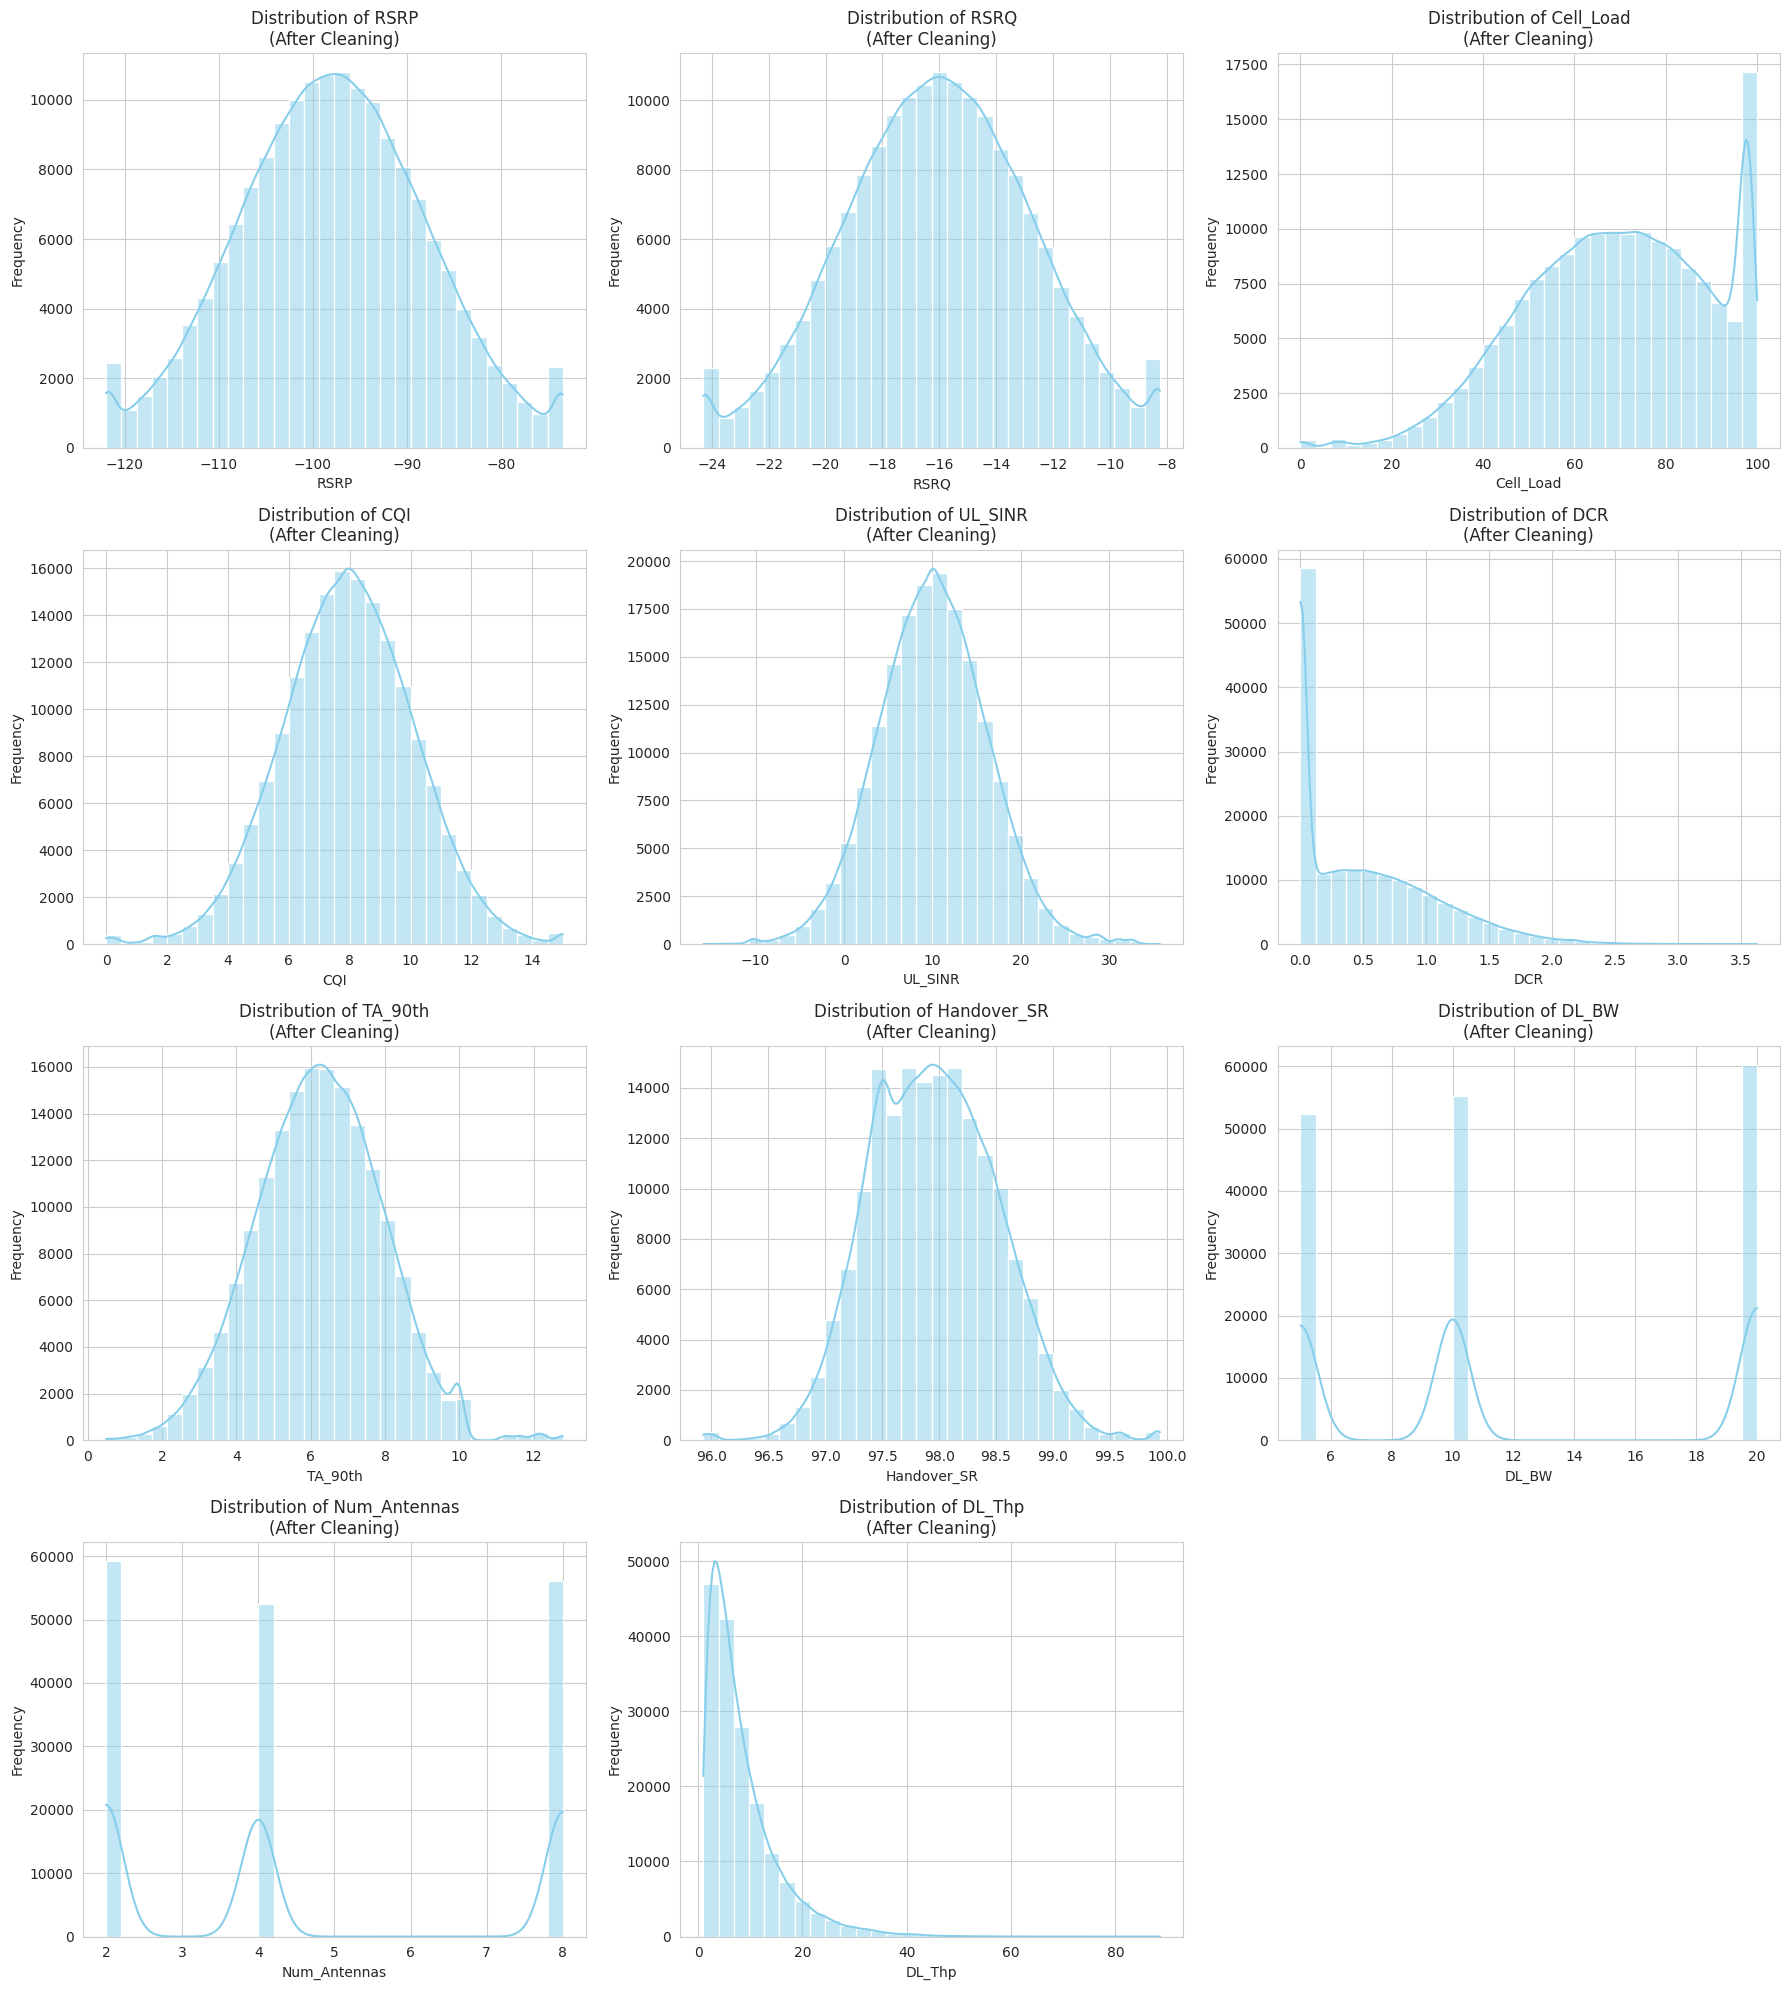

In [11]:
# 1. Identify numerical columns
numeric_cols = [col for col in df_cleaned.columns if df_cleaned[col].dtype in ["int64", "float64"]]

# 2. Calculate grid dimensions (3 columns per row)
n_cols = 3
n_rows = math.ceil(len(numeric_cols) / n_cols)

# 3. Create the figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows))
axes = axes.flatten()  # Flatten to iterate with a single index

# 4. Loop through KPIs and plot into the axes
for i, kpi in enumerate(numeric_cols):
    sns.histplot(df_cleaned[kpi], bins=30, kde=True, color="skyblue", ax=axes[i])
    axes[i].set_title(f"Distribution of {kpi}\n(After Cleaning)", fontsize=12)
    axes[i].set_xlabel(kpi)
    axes[i].set_ylabel("Frequency")

# 5. Hide any unused subplots (if the number of KPIs isn't a multiple of 3)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

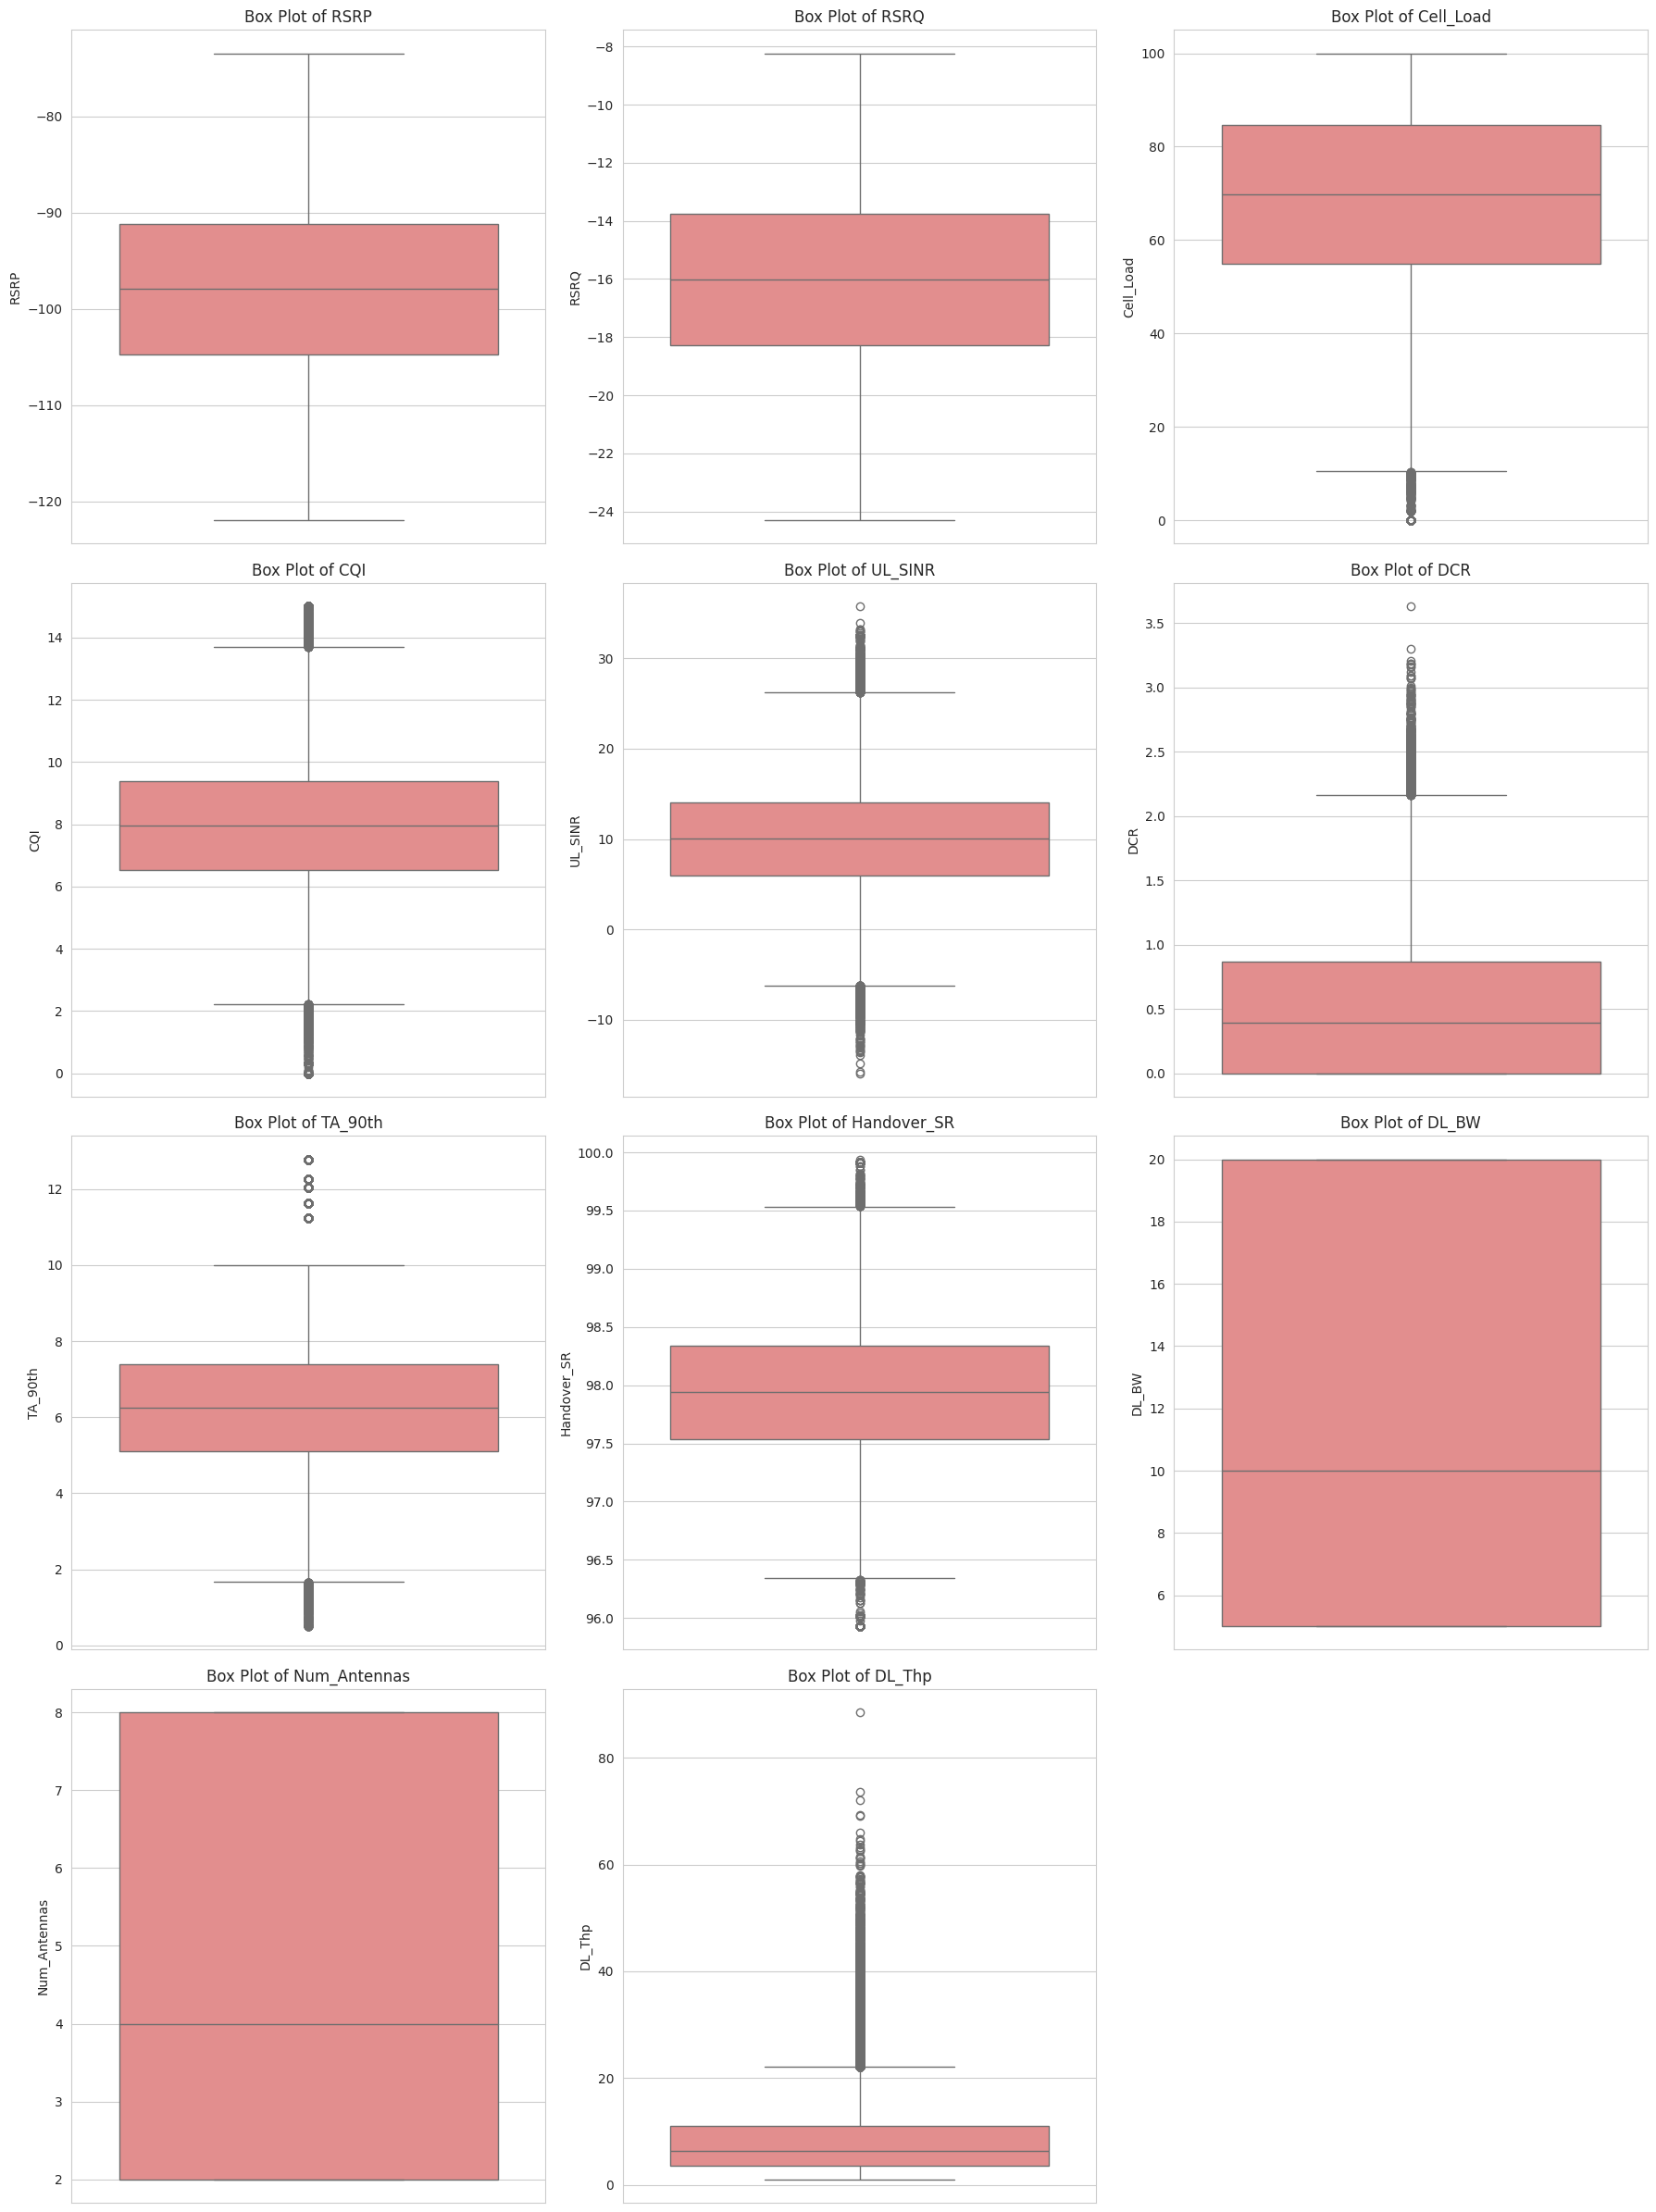

In [12]:
# Box Plot

# 3. Create the figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6 * n_rows))
axes = axes.flatten()  # Flatten the 2D array of axes into 1D

# 4. Loop through KPIs and plot into the axes
for i, kpi in enumerate(numeric_cols):
    sns.boxplot(y=df_cleaned[kpi], color="lightcoral", ax=axes[i])
    axes[i].set_title(f"Box Plot of {kpi}", fontsize=12)
    axes[i].set_ylabel(kpi)

# 5. Hide any unused subplots (white space)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

## 5.2 Bivariate Analysis (Feature Relationships)

Bivariate Analysis is the simultaneous analysis of two variables to determine the empirical relationship between them. While univariate analysis tells us "what the data looks like," bivariate analysis tells us "how variables move together"

This analysis is relevant because:

- A. Identifying Predictors for Machine Learning: It helps you select the most influential features. If bivariate analysis shows a strong correlation between CQI and DL_Thp, you know CQI must be a primary feature in your regression model.

- B. Uncovering Non-Linear Relationship:  Relationships are rarely simple. For example, Cell_Load might not affect Throughput much until it hits 70%, at which point the throughput drops exponentially. Bivariate plots (like scatter plots) reveal these "tipping points" that a simple correlation number might miss.

- C. Detecting Data Leakage or Redundancy: If two features (like RSRP and RSRQ) are almost perfectly correlated, including both in a model might cause Multicollinearity. Bivariate analysis allows you to spot redundant features and simplify your model.

- D. Validating Physical Network Logic: It serves as a "sanity check" for domain experts. If the data shows that Throughput decreases when Bandwidth increases, the bivariate analysis alerts you to a potential issue in the data collection or a major network fault that needs investigation.

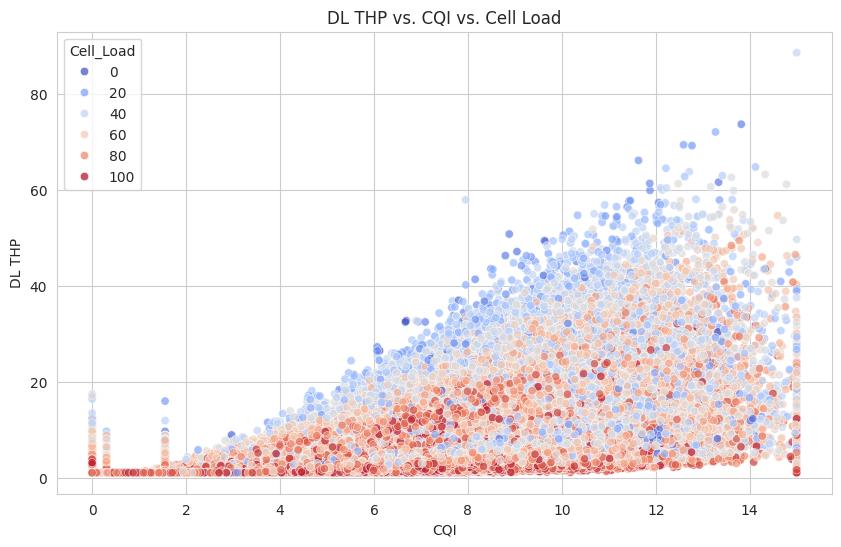

In [13]:
# 5.2.1 Scatter Plot: Relationship between SINR and Call Drop Risk
# Using Cell_Load as a hue to see if high load impacts the relationship

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="CQI", y="DL_Thp", hue="Cell_Load", data=df_cleaned, palette="coolwarm", alpha=0.7
)
plt.title("DL THP vs. CQI vs. Cell Load")
plt.xlabel("CQI")
plt.ylabel("DL THP")

plt.show()

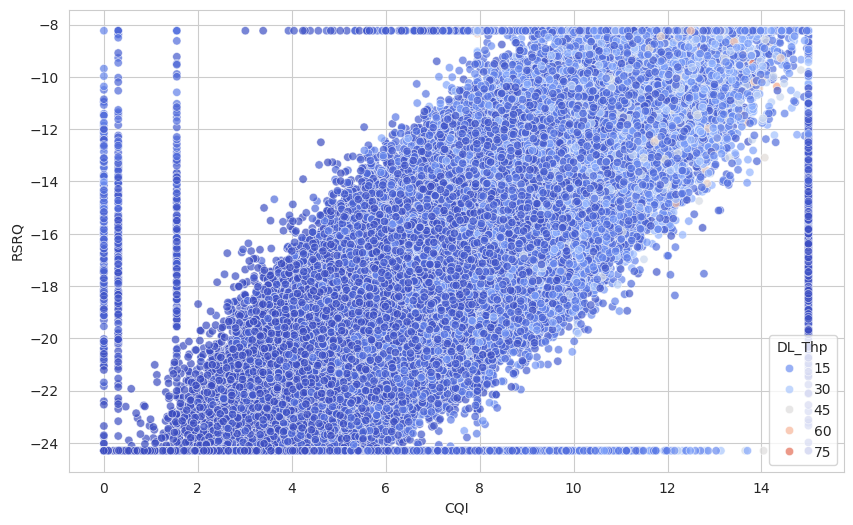

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="CQI", y="RSRQ", hue="DL_Thp", data=df_cleaned, palette="coolwarm", alpha=0.7
)
# plt.title("DL THP vs. CQI vs. Cell Load")
plt.xlabel("CQI")
plt.ylabel("RSRQ")

plt.show()

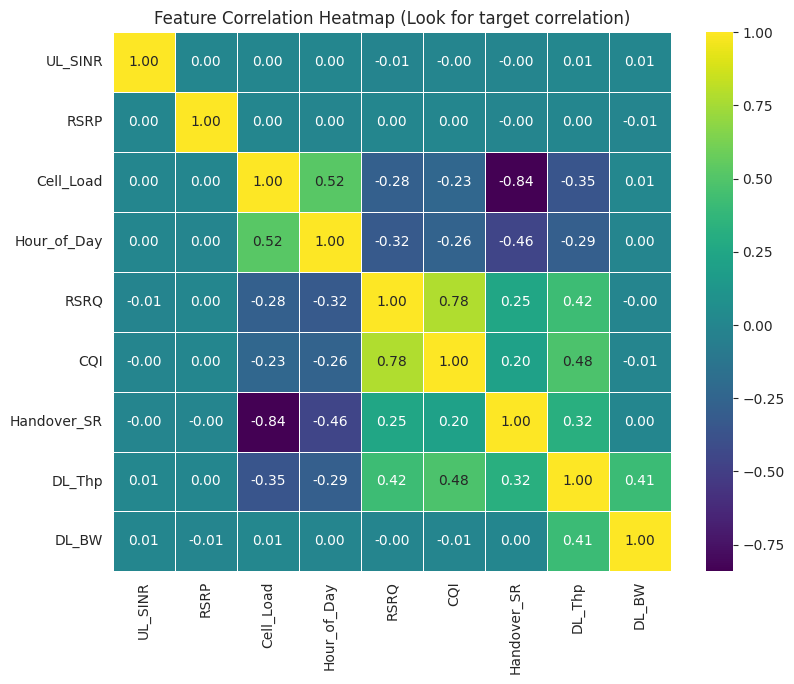

In [15]:
# 5.2.2 Correlation Heatmap: Overall Feature Relationships

correlation_matrix = df_cleaned[
    ["UL_SINR", "RSRP", "Cell_Load", "Hour_of_Day", "RSRQ", "CQI", "Handover_SR", "DL_Thp", "DL_BW"]].corr()
plt.figure(figsize=(9, 7))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="viridis", linewidths=0.5)
plt.title("Feature Correlation Heatmap (Look for target correlation)")
plt.show()

### A. Primary Positive Drivers of Throughput (DL_Thp)

This is the target variable, and its correlations confirm the physical logic of the network:

- DL_BW: A very strong positive correlation. This confirms that Bandwidth is the primary driver of capacity. Widening the "pipe" (e.g., 20 MHz vs. 5 MHz) directly increases the achievable speed.
- Num_Antennas: Also a very strong positive correlation. This reflects the gain from MIMO layers. More antennas allow for more spatial streams, multiplying the data rate.
- CQI: A strong positive correlation. Higher Channel Quality allows for more efficient modulation (256QAM), directly boosting speed.
- RSRQ: A solid positive correlation. Better signal quality (less interference) leads to better throughput, largely because it enables a higher CQI.

### B. Primary Negative Driver (Cell_Load)

- Cell_Load vs. DL_Thp: A moderate to strong negative correlation. As the cell gets busier (higher load), the user throughput drops. This is the congestion effect: resources must be shared, so each user gets a smaller slice of the pie.

### C. Radio Quality Chain

There is a clear chain of dependency among the radio metrics:
- RSRP vs. RSRQ: Strong positive correlation. While RSRQ includes interference, it is heavily dependent on the received signal power (RSRP). If the signal is weak, the quality is almost always poor.
- RSRQ vs. CQI: Extremely strong positive correlation. This indicates that in this dataset, the CQI reported by the UE is almost entirely determined by the Signal Quality (RSRQ). This is physically accurate, as SINR/RSRQ is the input for the CQI lookup table.
- RSRP vs. CQI: A strong positive correlation, which makes sense as RSRP drives RSRQ, which in turn drives CQI.

### D. Mobility and Distance Indicators

- TA_90th vs. RSRQ & CQI: Very strong negative correlations. TA (Timing Advance) is a measurement for distance. As the user gets further away (higher TA), the signal quality (RSRQ) and efficiency (CQI) degrade drastically. This confirms the "Cell Edge" effect.

- TA_90th vs. DL_Thp: Strong negative correlation. Users far from the tower get much lower speeds due to the combined effect of lower RSRQ/CQI and path loss.

### E. Handover Success Rate (Handover_SR)

- Handover_SR vs. Cell_Load: A very strong negative correlation. This suggests that congestion is the primary killer of mobility performance in this network. Highly loaded cells struggle to process handovers or lack the resources to accept new users, leading to failures.

### F. Irrelevant or Weak Features
- Hour_of_Day: Shows very weak linear correlation with most variables (near 0). This is expected because the relationship is likely cyclic/non-linear (sine wave), which a standard Pearson correlation matrix (linear) cannot capture effectively.

- Target_Call_Drop: Shows relatively weak linear correlations . This suggests that call drops are likely caused by complex, non-linear interactions or "tipping points" rather than a simple linear relationship with any single metric.

---

## 5.3 Bar Plot: Time-based seasonality analysis

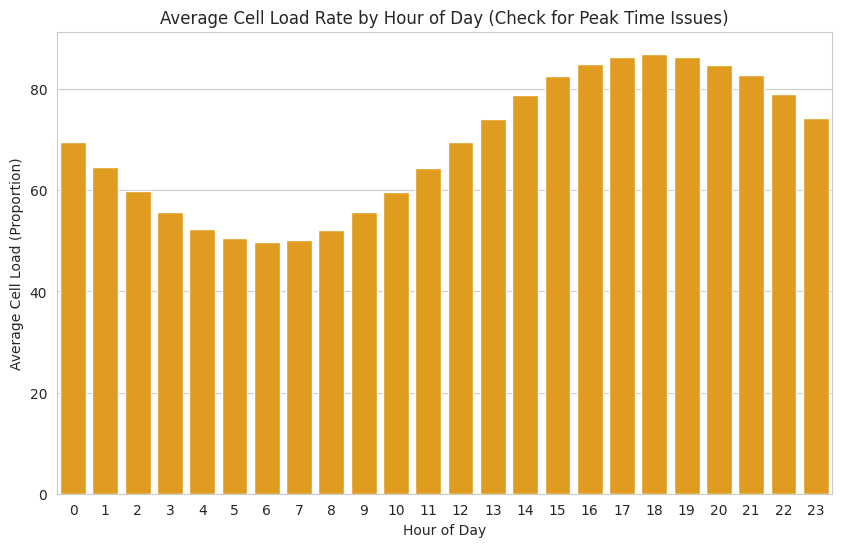

In [16]:
# 6. Bar Plot: Time-based seasonality analysis
# Check if Call Drops are more frequent during peak hours
drop_by_hour = df_cleaned.groupby("Hour_of_Day")["Cell_Load"].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x="Hour_of_Day", y="Cell_Load", data=drop_by_hour, color="orange")
plt.title("Average Cell Load Rate by Hour of Day (Check for Peak Time Issues)")
plt.xlabel("Hour of Day")
plt.ylabel("Average Cell Load (Proportion)")
plt.show()
#

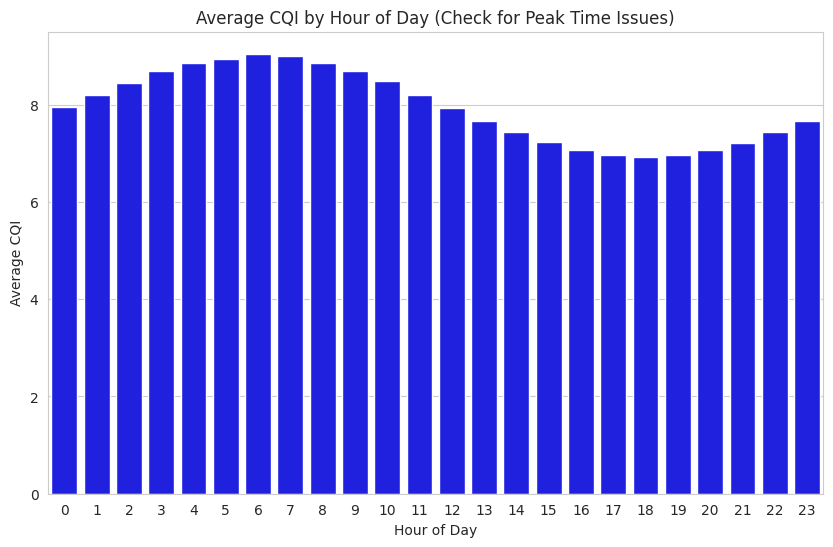

In [17]:
# 6. Bar Plot: Time-based seasonality analysis
# Check if Call Drops are more frequent during peak hours
drop_by_hour = df_cleaned.groupby("Hour_of_Day")["CQI"].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x="Hour_of_Day", y="CQI", data=drop_by_hour, color="blue")
plt.title("Average CQI by Hour of Day (Check for Peak Time Issues)")
plt.xlabel("Hour of Day")
plt.ylabel("Average CQI")
plt.show()
#

## 5.4 Feature Selection

### Summary for Modeling:

- **Redundancy Warning**: RSRQ, CQI, and TA_90th are highly collinear (correlations > 0.8). We might consider using PCA or selecting just the most robust one (likely CQI) to avoid multicollinearity issues in linear models.

- **Key Predictors**: To predict DL_Thp, the clear keys are  Bandwidth (DL_BW), Antennas (Num_Antennas), and Quality (CQI/RSRQ), moderated by the Congestion (Cell_Load).

- **Target Log Transformation ($\log(y)$)**

    - Handling Heteroscedasticity: Throughput data often exhibits higher variance at higher values (the error grows as the THP grows). Log transformation stabilizes this variance, ensuring the model's residuals are more uniform (homoscedastic).

    - Linearizing Exponential Decay: Since throughput often drops exponentially as Cell Load increases, taking the log of the target turns that exponential relationship into a linear one

    - Normalizing Distribution: Raw throughput is often right-skewed (many low values, few very high values). Log transformation helps normalize the target distribution, meeting a core statistical assumption of linear regression.

    - Enforcing Positivity: A standard linear model can predict negative throughput (physically impossible). A log-linear model, when exponentiated back to the original scale, mathematically guarantees that all predicted values will be greater than zero.

In [18]:
# Input Features (Predictors)
# Cell_ID and Timestamp are not used directly, only numerical KPIs and engineered time features.

FEATURES = ["RSRP", "UL_SINR", "TA_90th", "CQI", "DL_BW", "Cell_Load", "Num_Antennas"]
TARGET = "DL_Thp"

# 6. AI Models

## 6.1 Common Functions

In [18]:
def mean_absolute_percentage_error(y_true, y_pred):
    """
    Calculates the Mean Absolute Percentage Error (MAPE).
    It handles cases where y_true is zero by ignoring those samples.
    """
    # Convert inputs to NumPy arrays
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    
    # Calculate the percentage error, ignoring divisions by zero (where y_true is 0)
    # np.seterr(divide='ignore', invalid='ignore') temporarily suppresses warnings
    percentage_error = np.abs((y_true - y_pred) / y_true)
    
    # Filter out infinite or NaN values that result from division by zero in y_true
    # In real-world THP data, true THP of 0 is rare and often an indicator of no traffic,
    # so these samples are usually excluded or clipped. We exclude them here.
    finite_errors = percentage_error[np.isfinite(percentage_error)]
    
    return np.mean(finite_errors) * 100

# Helper function to evaluate models
def evaluate_model(y_true, y_pred, model_name):
    """Calculates and prints common regression metrics."""
    
    y_pred_back = np.expm1(y_pred)  # Convert log-thp back to original scale
    y_true_back = np.expm1(y_true)  # Convert log-thp back to original scale
    
    mae = mean_absolute_error(y_true_back, y_pred_back)
    mse = mean_squared_error(y_true_back, y_pred_back)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true_back, y_pred_back)
    mape = mean_absolute_percentage_error(y_true_back, y_pred_back)

    metrics[model_name] = {"MAE": mae, "RMSE": rmse, "MAPE": mape, "R2": r2}

    print(f"\n--- {model_name} Results ---")
    print(f"Mean Absolute Error (MAE): {mae:.2f} Mbps")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f} Mbps")
    print(f"R-squared (R2): {r2:.4f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}")

    return None

In [19]:
X = df_cleaned[FEATURES]
y_log = np.log1p(df_cleaned[TARGET])

# --- A. Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

# --- B. Feature Scaling (Crucial for Linear Models) ---

# Initialize the Scaler
scaler = StandardScaler()

# Fit the scaler ONLY on the training data and transform both sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

metrics = {}

Training set size: 134265 samples
Testing set size: 33567 samples


## 6.2  Linear Regression

Linear Regression is a statistical method that models the relationship between a dependent variable (Throughput) and one or more independent variables (KPIs) by fitting a linear equation to observed data. It uses Ordinary Least Squares (OLS) to minimize the sum of the squares of the vertical deviations (residuals) between each data point and the fitted line.

- **PROS: Analytical Transparency and Efficiency**

    - High Explainability & Transparency: Linear regression is often considered a "white-box" model. Each feature is assigned a coefficient that represents its direct influence. For example, a coefficient of 1.5 for DL_BW tells a network engineer exactly how many Mbps are gained per extra MHz of bandwidth, making it an invaluable tool for root-cause analysis and business reporting.

    - Minimal Computational Footprint (Fast Training): It is incredibly fast. This makes it ideal for real-time monitoring at the "Edge" of the network or for deployment in resource-constrained environments like individual Base Stations where low latency is critical.
    
    - Statistical Significance Testing: It provides p-values and confidence intervals for each feature, allowing engineers to mathematically prove which KPIs are truly driving performance and which are just "noise."

- **CONS: Structural Rigidity and Vulnerability**

    - Assumption of Linearity (Physical Misalignment): The primary drawback is that radio physics are inherently non-linear. Relationships like Signal Quality (SINR) to Spectral Efficiency follow the Shannon-Hartley theorem (logarithmic), and congestion (Cell Load) may impact throughput exponentially. A linear model will "under-fit" these curves, leading to poorer predictions at the extreme ends (very high or very low throughput).

    - High Sensitivity to Outliers: Since the OLS method squares the errors, a single extreme outlier will exert a disproportionate "pull" on the regression line. This can tilt the entire model, leading to biased coefficients and degraded performance if data cleaning is not perfect.

    - Feature Independence (Multicollinearity): Linear regression assumes that features are independent. In Mobile Networks, metrics like RSRP and RSRQ are highly correlated. This can cause "coefficient instability," where the model struggles to decide which feature is actually responsible for the change in throughput, making the interpretation unreliable.

In [20]:
# ------------------------------------------------------------------------------
# Model 1: Linear Regression (Simple, Explainable)
# ------------------------------------------------------------------------------
print("\n[4.1] Training Simple Linear Regression Model...")

# 1. Initialize and train the model using SCALED data
lin_reg = LinearRegression()
start_time = time.time()
lin_reg.fit(X_train_scaled, y_train)
train_time_lr = time.time() - start_time

# 2. Make predictions

start_time = time.time()
y_pred_linear = lin_reg.predict(X_test_scaled)
inference_time_lr = time.time() - start_time

# 3. Evaluate
evaluate_model(y_test, y_pred_linear, "Linear Regression")
metrics["Linear Regression"]["Train Time (s)"] = train_time_lr
metrics["Linear Regression"]["Inference Time (s)"] = inference_time_lr



[4.1] Training Simple Linear Regression Model...

--- Linear Regression Results ---
Mean Absolute Error (MAE): 1.54 Mbps
Root Mean Squared Error (RMSE): 2.38 Mbps
R-squared (R2): 0.8849
Mean Absolute Percentage Error (MAPE): 20.5840


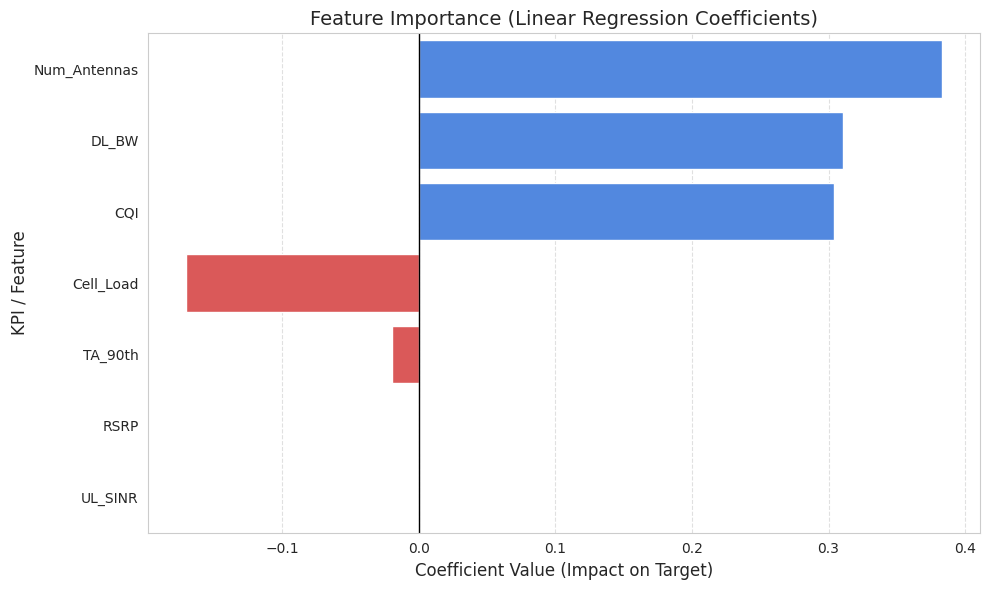

In [21]:
# Get the feature names from your original dataframe (X_train)
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f"Feature {i}" for i in range(X_train_scaled.shape[1])]

# Create a DataFrame for visualization
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lin_reg.coef_
})

# Sort by absolute value to see the most influential first
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
colors = ['#ef4444' if x < 0 else '#3b82f6' for x in feature_importance['Coefficient']]
sns.barplot(x='Coefficient', y='Feature', data=feature_importance, palette=colors)

plt.title('Feature Importance (Linear Regression Coefficients)', fontsize=14)
plt.xlabel('Coefficient Value (Impact on Target)', fontsize=12)
plt.ylabel('KPI / Feature', fontsize=12)
plt.axvline(x=0, color='black', linestyle='-', linewidth=1)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


## 6.3  Random Forest Regression

Random Forest is an ensemble learning method that builds a "forest" of multiple decision trees. For regression, it takes the average prediction from all these individual trees to produce a final result. 

- **PROS: Robustness and Pattern Recognition**
    - HIGH ACCURACY (Non-Linear Mapping): Random Forest is good at capturing the complex, non-linear interactions inherent in 4G/5G physics. For example, the impact of Cell Load on throughput isn't constant; it changes drastically depending on the SINR. While a linear model struggles with these "if-this-then-that" scenarios, Random Forest maps these multi-dimensional relationships naturally.

    - LOW OVERFITTING RISK: By averaging the results of many trees, the model effectively cancels out the "noise" or errors that individual trees might memorize. This built-in ensemble mechanism reduces the variance of the model, making it much more reliable when applied to new, unseen network data compared to a single deep decision tree.

    - FEATURE IMPORTANCE SCORING: One of its most valuable outputs is a "Feature Importance" ranking. It calculates exactly how much each KPI (like CQI, BW, or TA) contributes to reducing the overall error. This allows network engineers to move beyond just "predicting" and actually "understanding" which hardware or radio parameters are the primary bottlenecks in the network.

- **CONS: Complexity and Computational Overhead**
    - LOW EXPLAINABILITY (Black Box): Unlike Linear Regression, which provides a clear mathematical formula (coefficients), a Random Forest is composed of hundreds of deep trees with thousands of branching points. This makes it nearly impossible to explain exactly why a specific prediction was made for a specific user, which can be a hurdle for "Trustworthy AI" requirements in telecommunications.

    - SLOWER INFERENCE & RESOURCE INTENSITY: Because the model must traverse every single tree in the forest to calculate an average, the prediction time (latency) and memory usage are higher. While this is usually negligible for offline analysis, it can become a constraint for real-time, ultra-low-latency 5G applications (like millisecond-level scheduling) where Linear Regression’s near-instant calculation is preferred.

    - LACK OF EXTRAPOLATION: Random Forest cannot predict values outside the range of the training data. If the highest throughput in your dataset is 100 Mbps, the model will never predict 110 Mbps, even if the radio conditions are perfect. 

In [22]:
# ------------------------------------------------------------------------------
# Model 2: Random Forest Regressor (Ensemble, Powerful, Non-linear)
# ------------------------------------------------------------------------------
print("\n[4.2] Training Random Forest Regressor Model...")

# 1. Initialize and train the model
# NOTE: Random Forest does NOT require scaling, so we use the unscaled data
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
start_time = time.time()
rf_reg.fit(X_train, y_train)
train_time_rf = time.time() - start_time

# 2. Make predictions

start_time = time.time()
y_pred_rf = rf_reg.predict(X_test)
inference_time_rf = time.time() - start_time

# 3. Evaluate
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")
metrics["Random Forest Regressor"]["Train Time (s)"] = train_time_rf
metrics["Random Forest Regressor"]["Inference Time (s)"] = inference_time_rf



[4.2] Training Random Forest Regressor Model...

--- Random Forest Regressor Results ---
Mean Absolute Error (MAE): 1.24 Mbps
Root Mean Squared Error (RMSE): 1.99 Mbps
R-squared (R2): 0.9190
Mean Absolute Percentage Error (MAPE): 15.2048


|              |      0 |
|:-------------|-------:|
| Num_Antennas | 0.3396 |
| CQI          | 0.3001 |
| DL_BW        | 0.2333 |
| Cell_Load    | 0.0961 |
| TA_90th      | 0.0105 |
| UL_SINR      | 0.0103 |
| RSRP         | 0.0101 |


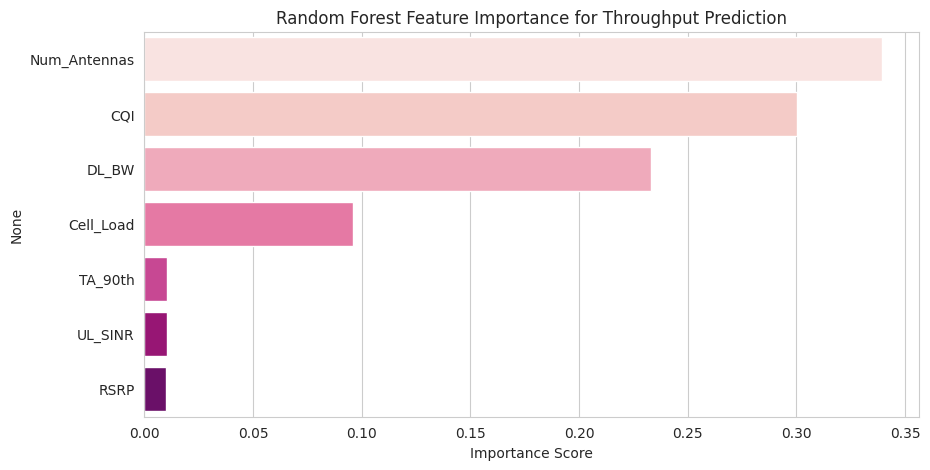

In [23]:
feature_importance = pd.Series(rf_reg.feature_importances_, index=FEATURES).sort_values(
    ascending=False
)
print(feature_importance.to_markdown(floatfmt=".4f"))

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance.values, y=feature_importance.index, palette="RdPu")
plt.title("Random Forest Feature Importance for Throughput Prediction")
plt.xlabel("Importance Score")
plt.show()

## 6.4  XGBoost 

XGBoost is an advanced implementation of Gradient Boosted Decision Trees (GBDT). Unlike Random Forest (which builds trees in parallel), XGBoost builds trees sequentially. Each new tree is specifically designed to correct the errors (residuals) made by the previous trees. It uses a gradient descent algorithm to minimize a loss function, making it an additive model that focuses on the most difficult samples in the dataset.

- **PROS: State-of-the-Art Performance and Efficiency**
    - SUPERIOR ACCURACY: In most telecommunications use cases, XGBoost outperforms almost every other algorithm. Its ability to learn from past mistakes (boosting) allows it to find extremely subtle patterns in the radio environment that both Linear Regression and Random Forest might miss.

    - HIGHLY OPTIMIZED & SCALABLE: Despite its complexity, XGBoost is designed for speed. It uses parallel processing, tree pruning, and hardware optimization to train significantly faster than traditional Gradient Boosting implementations. It can handle millions of rows of network KPIs with ease.

    - BUILT-IN REGULARIZATION: This prevents the model from becoming too complex and "memorizing" specific cell behaviors, which helps the model generalize better when moved to production

- **CONS: Tuning Intensity and "Greedy" Nature**
    - SENSITIVE TO HYPERPARAMETERS: While Linear Regression is "plug-and-play," XGBoost is sensitive. To get the best results, you must carefully tune parameters like learning_rate, max_depth, and subsamping. A poorly tuned XGBoost can easily underperform or overfit.

    - RISK OF OVERFITTING ON SMALL DATASETS: Because it is so powerful and focuses on correcting every small error, it can "chase outliers" if the dataset is too small or noisy. If your data cleaning (like the < 1 Mbps filter we discussed) isn't solid, XGBoost might try too hard to model those anomalies.

    - BLACK BOX & COMPLEXITY: Like Random Forest, it lacks the immediate "coefficient transparency" of a linear model. Explaining why a specific 5G user was predicted a certain throughput requires external tools like SHAP or LIME, which adds an extra layer of complexity to the optimization workflow.

In [24]:
# Standardize features (essential for DNN, helpful for XGBoost convergence)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 3. Model A: XGBoost Regressor ---
print("Training XGBoost Regressor...")
# Hyperparameters optimized for tabular regression
xg_reg = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=600,
    learning_rate=0.02,
    max_depth=6,
    subsample=0.2,
    colsample_bytree=0.8,
    n_jobs=-1)
    
start_time = time.time()
xg_reg.fit(X_train_scaled, y_train)
train_time_xg = time.time() - start_time


Training XGBoost Regressor...


In [25]:
start_time = time.time()
y_pred_xg = xg_reg.predict(X_test_scaled)
inference_time_xg = time.time() - start_time

In [26]:
evaluate_model(y_test, y_pred_xg, "XG")
metrics["XG"]["Train Time (s)"] = train_time_xg
metrics["XG"]["Inference Time (s)"] = inference_time_xg


--- XG Results ---
Mean Absolute Error (MAE): 1.20 Mbps
Root Mean Squared Error (RMSE): 1.93 Mbps
R-squared (R2): 0.9237
Mean Absolute Percentage Error (MAPE): 14.7988


## 6.5  Deep Neural Network (MLP)

A Deep Neural Network (DNN), specifically a Multi-Layer Perceptron (MLP), is a "bio-inspired" model consisting of multiple layers of interconnected nodes (neurons). It passes input KPIs through successive hidden layers where data is transformed by weights and non-linear activation functions (like ReLU).

Through a process called Backpropagation, the network adjusts its internal weights to minimize the difference between the predicted and actual throughput, essentially "learning" a high-dimensional mathematical function that maps radio conditions to performance.

- **PROS: High-Dimensional Learning and Flexibility**
    - UNIVERSAL APPROXIMATOR: Mathematically, a DNN with enough layers can approximate any continuous function. This makes it theoretically superior at capturing the "hidden" physics of 4G/5G, such as the complex interplay between beamforming, interference patterns, and multi-user scheduling that tree-based models might miss.

    - FEATURE EXTRACTION POWER: While tree models look at features individually to make splits, Neural Networks are excellent at creating "latent features"—combinations of inputs that represent higher-level concepts (e.g., combining RSRP, RSRQ, and TA into a single internal representation of "Channel Pathloss").
    
    - TRANSFER LEARNING POTENTIAL: A model trained on one city can be used as a starting point (pre-trained model) for a different city. You only need to "fine-tune" the last few layers, saving massive amounts of time and data collection effort.

- **CONS: Data Hunger and Fragile Setup**
    - DATA HUNGRY: A DNN requires significantly more data than a Random Forest or XGBoost to converge. If the dataset is small or has low variety, the network will likely perform worse than a simple Linear Regression.

    - "BLACK BOX" EXTREME: Neural Networks are the least explainable models. With thousands or millions of weights, it is virtually impossible for a human to understand the internal logic. This makes it very difficult to debug why a specific throughput prediction was wrong without advanced tools.
    
    - HIGH SENSITIVITY TO PREPROCESSING: Unlike tree-based models, DNNs are extremely sensitive to data scaling. If you don't perfectly normalize your KPIs (bringing them all to a 0-1 or -1 to 1 range), the "Gradients" can explode or vanish, causing the model to fail to train entirely.
    
    - COMPUTATIONAL COST & LATENCY: Training a DNN requires significant hardware for efficiency. Even for inference (prediction), they are more computationally expensive than other models. In the context of "Real-Time RIC" or O-RAN, the latency introduced by a deep network might exceed the strict millisecond requirements of 5G control loops.
    
    - HYPERPARAMETER "MINEFIELD": Finding the right architecture (number of layers, neurons per layer, learning rate, dropout, batch size) is an art form. It requires much more manual trial-and-error than other algorithms.

In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 3. Optimized DNN Architecture ---
# We introduce BatchNormalization and Dropout to improve stability and generalization.
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    
    # Block 1
    Dense(128, activation='swish'), # 'swish' usually performs better than relu for regression
    BatchNormalization(),
    Dropout(0.1),
    
    # Block 2
    Dense(64, activation='swish'),
    BatchNormalization(),
    Dropout(0.1),
    
    # Block 3
    Dense(32, activation='relu'),
    
    # Output
    Dense(1, activation='linear')
])

# Use a custom optimizer with a specific initial learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# --- 4. Advanced Callbacks ---
# EarlyStopping: Stops if no improvement
es = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# ReduceLROnPlateau: Reduces learning rate when the model stops improving
# This is key to "fine-tune" the weights at the end of training.
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

# --- 5. Model Training ---
print("Starting Optimized DNN Training...")
start_time = time.time()
history = model.fit(
    X_train_scaled, y_train,
    epochs=150,
    batch_size=64,
    validation_split=0.15,
    callbacks=[es, reduce_lr],
    verbose=0
)

train_time_mlp = time.time() - start_time

2026-01-17 16:22:11.843213: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Starting Optimized DNN Training...


In [28]:
start_time = time.time()
y_pred_mlp = model.predict(X_test_scaled, verbose=0).flatten()
inference_time_mlp = time.time() - start_time


evaluate_model(y_test, y_pred_mlp, "MLP")
metrics["MLP"]["Train Time (s)"] = train_time_mlp
metrics["MLP"]["Inference Time (s)"] = inference_time_mlp


--- MLP Results ---
Mean Absolute Error (MAE): 1.22 Mbps
Root Mean Squared Error (RMSE): 1.99 Mbps
R-squared (R2): 0.9192
Mean Absolute Percentage Error (MAPE): 14.7213


## 7  Comparison of Model Performance

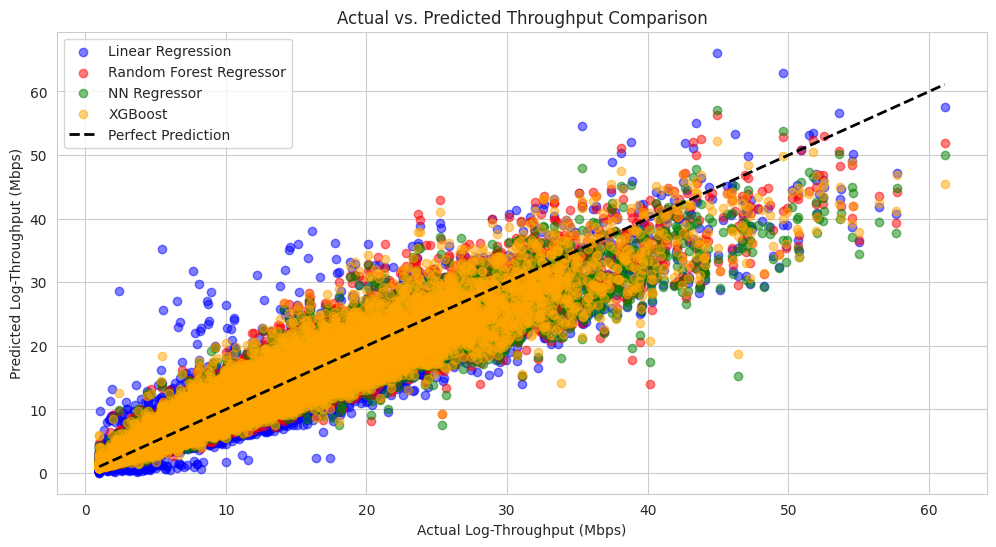

In [29]:
# --- C. Visual Comparison of Model Performance ---

y_test_back = np.expm1(y_test)  # Convert log-thp back to original scale

# Plot actual vs predicted values for a visual check
plt.figure(figsize=(12, 6))
plt.scatter(y_test_back, np.expm1(y_pred_linear), alpha=0.5, label="Linear Regression", color="blue")
plt.scatter(y_test_back, np.expm1(y_pred_rf), alpha=0.5, label="Random Forest Regressor", color="red")
plt.scatter(y_test_back, np.expm1(y_pred_mlp), alpha=0.5, label="NN Regressor", color="green")
plt.scatter(y_test_back, np.expm1(y_pred_xg), alpha=0.5, label="XGBoost", color="orange")
plt.plot(
    [y_test_back.min(), y_test_back.max()],
    [y_test_back.min(), y_test_back.max()],
    "k--",
    lw=2,
    label="Perfect Prediction",
)
plt.xlabel("Actual Log-Throughput (Mbps)")
plt.ylabel("Predicted Log-Throughput (Mbps)")
plt.title("Actual vs. Predicted Throughput Comparison")
plt.legend()
plt.show()

In [30]:
print("\n" + "=" * 20 + " MODEL COMPARISON & ANALYSIS " + "=" * 20)
results_df = pd.DataFrame(metrics).T.sort_values(by="R2", ascending=False)
print("\n[4.3] Summary of Regression Metrics:")
print(results_df.to_markdown(floatfmt=".4f"))


==================== MODEL COMPARISON & ANALYSIS ====================

[4.3] Summary of Regression Metrics:
|                         |    MAE |   RMSE |    MAPE |     R2 |   Train Time (s) |   Inference Time (s) |
|:------------------------|-------:|-------:|--------:|-------:|-----------------:|---------------------:|
| XG                      | 1.2011 | 1.9344 | 14.7988 | 0.9237 |          18.8965 |               0.2780 |
| MLP                     | 1.2180 | 1.9909 | 14.7213 | 0.9192 |         169.1293 |               1.4028 |
| Random Forest Regressor | 1.2418 | 1.9931 | 15.2048 | 0.9190 |          26.3936 |               0.4767 |
| Linear Regression       | 1.5397 | 2.3767 | 20.5840 | 0.8849 |           0.0224 |               0.0007 |


# 8. Conclusions (TO  BE UPDATED)

## Accuracy Performance Analysis

**XG (XGBoost): The Absolute Winner**

XGBoost proves to be the most robust model with the highest R² () and the lowest absolute and quadratic errors. Its ability to handle non-linear relationships through gradient-boosted trees gives it a significant edge in raw precision.

**MLP (Multi-Layer Perceptron): The Deep Learning Challenger**

The neural network is highly competitive, achieving the best MAPE, indicating it is slightly more accurate in relative percentage terms. However, its higher RMSE compared to XG suggests it is slightly more sensitive to outliers.

**Random Forest: Consistent Ensemble Performance**

Random Forest sits almost level with the MLP in terms of R². While it is a very solid performer, in this specific dataset, it falls slightly behind the Boosting approach of XG and the architecture of the MLP.

## Operational Efficiency Analysis

The metrics reveal dramatic differences in computational requirements:

**Training Load:**

- The MLP is by far the most expensive model to train. It is nearly 9 times slower than XGBoost and 6.4 times slower than Random Forest.

- Linear Regression is essentially instantaneous (0.02s), though it sacrifices roughly 4% of explained variance (R²).

**Inference Latency:**

- In a real-time production environment, XGBoost is very efficient (0.27s).

- The MLP shows a significant latency of 1.40s. This makes it less ideal for high-scale applications requiring immediate responses compared to XG.

## Final Recommendations

Top Choice: XGBoost (XG). This is the most balanced model. It offers maximum precision with reasonable training times and fast inference. It is the logical choice for deployment.

When to use MLP? Only recommended if the primary goal is minimizing relative error (MAPE), though the marginal gain over XG likely does not justify the massive increase in computational cost (nearly 3 minutes of training).

When to use Linear Regression: Its R² of 0.88 is surprisingly high for such a simple model. It should be used only in environments with extreme resource constraints or where full model transparency (interpretable coefficients) is a legal or technical requirement.